In [1]:
#importing the libraries and datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('heart.csv')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [3]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [4]:
cate_val = []
cont_val = []
for column in data.columns:
    if data[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [5]:
cate_val

['Sex',
 'ChestPainType',
 'FastingBS',
 'RestingECG',
 'ExerciseAngina',
 'ST_Slope',
 'HeartDisease']

In [6]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [7]:
cont_val

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [8]:
data = pd.get_dummies(data,columns = cate_val,drop_first=True)

In [9]:
data = data.astype(int)

In [10]:
data

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,FastingBS_1,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,HeartDisease_1
0,40,140,289,172,0,1,1,0,0,0,1,0,0,0,1,0
1,49,160,180,156,1,0,0,1,0,0,1,0,0,1,0,1
2,37,130,283,98,0,1,1,0,0,0,0,1,0,0,1,0
3,48,138,214,108,1,0,0,0,0,0,1,0,1,1,0,1
4,54,150,195,122,0,1,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,132,1,1,0,0,1,0,1,0,0,1,0,1
914,68,144,193,141,3,1,0,0,0,1,1,0,0,1,0,1
915,57,130,131,115,1,1,0,0,0,0,1,0,1,1,0,1
916,57,130,236,174,0,0,1,0,0,0,0,0,0,1,0,1


In [11]:
#features scaling
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

In [12]:
X = data.drop('HeartDisease_1',axis=1)
y = data['HeartDisease_1']

In [13]:
X.shape, y.shape

((918, 15), (918,))

In [14]:
#splitting dataset for train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,train_size=0.8)

In [15]:
X_train.shape,y_train.shape

((734, 15), (734,))

In [16]:
X_test.shape, y_test.shape

((184, 15), (184,))

In [17]:
#for linear model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# create instances of all models
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
}

for name, model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(f"{name}  with accuracy : {accuracy_score(y_test,y_pred)}")

Logistic Regression  with accuracy : 0.8532608695652174
Support Vector Machine  with accuracy : 0.8641304347826086
K-Nearest Neighbors  with accuracy : 0.842391304347826


In [18]:
#for non-linear algorithm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [19]:
#Nonlinear ML algorithms can handle categorical variables directly algorithms like decision trees and random forests,
#which naturally handle categorical variables, one-hot encoding may not be necessary.
data = pd.read_csv('heart.csv')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [20]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# for col in cate_val:
#     data[col] = le.fit_transform(data[col])

In [21]:
#for column['Sex']
sex_dict={
    'M':1,
    'F':0
}
data['Sex'] = data['Sex'].map(sex_dict)

In [22]:
# Define the mapping dictionary
chest_pain_type_dict = {
    'ATA': 0,
    'NAP': 1,
    'ASY': 2,
    'TA': 3
}

# Apply the mapping to the 'ChestPainType' column
data['ChestPainType'] = data['ChestPainType'].map(chest_pain_type_dict)

In [23]:
# Define the mapping dictionary
rest_ecg_dict = {
    'Normal': 0,
    'ST': 1,
    'LVH': 2
}

# Apply the mapping to the 'RestingECG' column
data['RestingECG'] = data['RestingECG'].map(rest_ecg_dict)


In [24]:
#for column['ExerciseAngina']
ExerciseAngina_dict={
    'N':1,
    'Y':0
}
data['ExerciseAngina'] = data['ExerciseAngina'].map(ExerciseAngina_dict)

In [25]:
# Define the mapping dictionary
slope_dict = {
    'Up': 0,
    'Flat': 1,
    'Down': 2
}

# Apply the mapping to the 'ST_Slope' column
data['ST_Slope'] = data['ST_Slope'].map(slope_dict)



In [26]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,0,140,289,0,0,172,1,0.0,0,0
1,49,0,1,160,180,0,0,156,1,1.0,1,1
2,37,1,0,130,283,0,1,98,1,0.0,0,0
3,48,0,2,138,214,0,0,108,0,1.5,1,1
4,54,1,1,150,195,0,0,122,1,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,0,132,1,1.2,1,1
914,68,1,2,144,193,1,0,141,1,3.4,1,1
915,57,1,2,130,131,0,0,115,0,1.2,1,1
916,57,0,0,130,236,0,2,174,1,0.0,1,1


In [27]:
X = data.drop('HeartDisease',axis=1)
y = data['HeartDisease']

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [29]:
X_train.shape,y_train.shape

((734, 11), (734,))

In [30]:
X_test.shape,y_test.shape

((184, 11), (184,))

In [31]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_preds = rfc.predict(X_test)
print(f'The accuracy is {accuracy_score(y_preds,y_test)}')

The accuracy is 0.875


In [32]:
# # hypertuning using randomizedSearchCV
# from sklearn.model_selection import RandomizedSearchCV
# rfc = RandomForestClassifier()
# param_grid = {'n_estimators':np.arange(50,200),
#     'criterion':['gini','entropy'],
#     'max_depth':np.arange(2,25),
#     'min_samples_split':np.arange(2,25),
#     'min_samples_leaf':np.arange(2,25)}

# rscv_model = RandomizedSearchCV(rfc,param_grid, cv=5)
# rscv_model.fit(X_train,y_train)
# print("Best Parameters:", rscv_model.best_params_)

In [33]:
rfc = RandomForestClassifier(n_estimators= 178, min_samples_split= 8,
                             min_samples_leaf= 7, max_depth=5, criterion= 'gini')
rfc.fit(X_train,y_train)
y_preds = rfc.predict(X_test)
print(f'The accuracy is {accuracy_score(y_preds,y_test)}')

The accuracy is 0.8695652173913043


In [34]:
#cross-validation
from sklearn.model_selection import cross_val_score
rfc_new = RandomForestClassifier(n_estimators= 178, min_samples_split= 8,
                             min_samples_leaf= 7, max_depth=5, criterion= 'gini')
scores = cross_val_score(rfc_new, X, y, cv=5)
scores

array([0.89130435, 0.83695652, 0.85326087, 0.82513661, 0.73224044])

In [35]:
from sklearn.metrics import confusion_matrix,classification_report,f1_score
print(f"Confusion Matrix: {confusion_matrix(y_test, y_preds)}")
print()
print(f"Classification Report: {classification_report(y_test, y_preds,zero_division= 0)}")
print()
print(f"F1_Score : {f1_score(y_test, y_preds,average='macro', zero_division=0)}")

Confusion Matrix: [[65 12]
 [12 95]]

Classification Report:               precision    recall  f1-score   support

           0       0.84      0.84      0.84        77
           1       0.89      0.89      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184


F1_Score : 0.8660031557227819


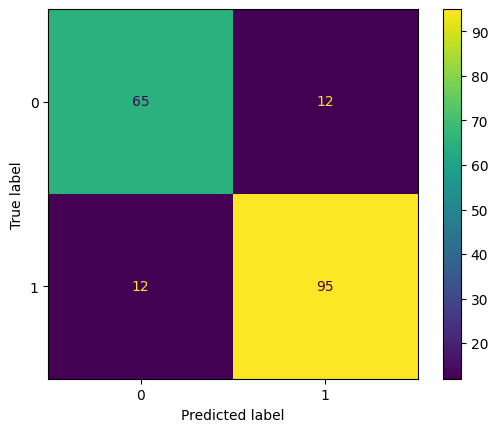

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_preds)
cm_plot = ConfusionMatrixDisplay(cm)
cm_plot.plot()

In [37]:
data = {
    'Age': [40],
    'Sex': [1],
    'ChestPainType': [0],
    'RestingBP': [140],
    'Cholesterol': [289],
    'FastingBS': [0],
    'RestingECG': [0],
    'MaxHR': [172],
    'ExerciseAngina': [1],
    'Oldpeak': [0.0],
    'ST_Slope': [0],
}

new_df = pd.DataFrame(data)
new_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,0,140,289,0,0,172,1,0.0,0


In [38]:
p = rfc.predict(new_df)
if p[0]==0:
    print("No Disease")
else:
    print("Disease")

No Disease


In [40]:
# import pickle
# pickle.dump(rfc,open('heartdisease.pkl','wb'))